In [2]:
%load_ext autoreload
%autoreload 2
from storytelling import *

In [3]:
yesemite = "../dat/wildfire_yosemite.csv"
df = pd.read_csv(yesemite)

In [4]:
df.head(2)

,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,370586020070563841,RT @AP: Wildfire near Yosemite more than tripl...,Thu Aug 22 16:39:27 +0000 2013,74,141529750,5605,3.705746e+17,Wildfire near Yosemite more than triples in si...,Thu Aug 22 15:54:02 +0000 2013,74.0,51241574.0,13803375.0
1,370607666386579457,RT @DRUDGE_REPORT: Yosemite wildfire balloons ...,Thu Aug 22 18:05:27 +0000 2013,13,20715638,3786,3.706056e+17,Yosemite wildfire balloons to 84 square miles ...,Thu Aug 22 17:57:05 +0000 2013,13.0,14669951.0,1326626.0


In [5]:
df.shape

(5314, 12)

In [6]:
DC = TwitterCleaner()

In [7]:
Data = []
for i in range(df.shape[0]):
    Data.append(DC.Clean(df.loc[i, "text"]))

In [8]:
Clean_sentences = []
for i in Data:
    Clean_sentences.append(" ".join(i))

In [9]:
Clean_sentences[:5]

['wildfire near yosemite triples size overnight threatens homes buidlings',
 'yosemite wildfire balloons square miles overnight',
 'wildfire near yosemite triples size overnight threatens homes buidlings',
 'yosemite area wildfire balloons size overnight',
 'wildfire near yosemite triples size overnight threatens homes buidlings']

In [11]:
". ".join(Clean_sentences)

'wildfire near yosemite triples size overnight threatens homes buidlings. yosemite wildfire balloons square miles overnight. wildfire near yosemite triples size overnight threatens homes buidlings. yosemite area wildfire balloons size overnight. wildfire near yosemite triples size overnight threatens homes buidlings. rimfire near yosemite np grows acres maps info wildfire. yosemite area wildfire balloons size overnight montereybay. yosemite area wildfire balloons size overnight. wildfire burning control near yosemite. wildfire near yosemite triples size overnight threatens homes buidlings. yosemite area wildfire balloons size overnight. rimfire mavericksmusic berryfest yosemite area wildfire balloons size overnight. wildfire near yosemite triples size overnight threatens homes buidlings. yosemite area wildfire balloons size overnight. wildfire near yosemite burns control threatens structures. wildfire near yosemite tripled size w buildings threatened flames watch live. yosemite wildfir

In [7]:
DC.corpusWC(Data, "yosemite.1gram.wc.txt")

In [8]:
vocabularies = pd.read_csv("yosemite.1gram.wc.txt", names=["Word", "Count"], delimiter="\t")["Word"].values[:200]
#vocabularies
BW = DC.BagOfWords(Data, vocabularies)

In [9]:
BW

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

(5314, 40)


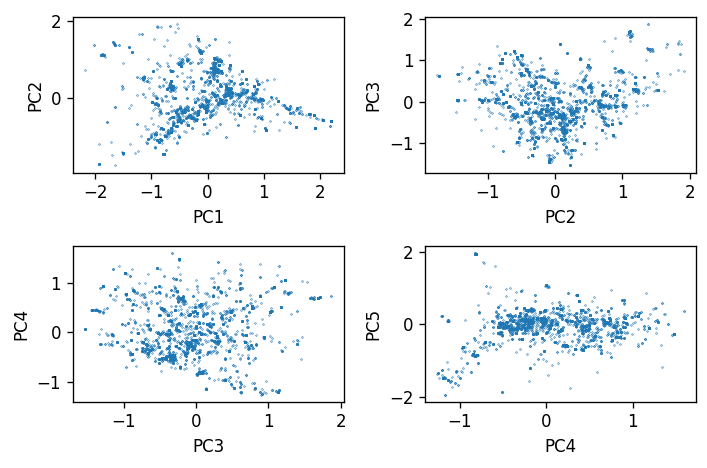

In [10]:
pca = PCA(n_components=40, svd_solver='arpack')
X = pca.fit_transform(BW)
print(X.shape)
fig, axs = plt.subplots(2,2,dpi=120)
for i,(j,k) in enumerate([(0,0),(0,1),(1,0),(1,1)]):
    axs[j,k].scatter(X[:,i], X[:,i+1], s=0.1)
    axs[j,k].set_xlabel("PC%d"%(i+1))
    axs[j,k].set_ylabel("PC%d"%(i+2))
fig.tight_layout()
plt.show()

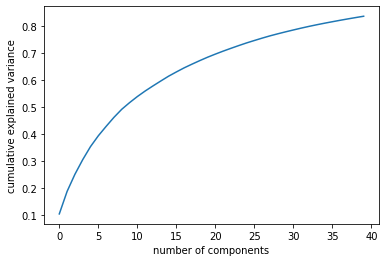

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(X[:, :40])

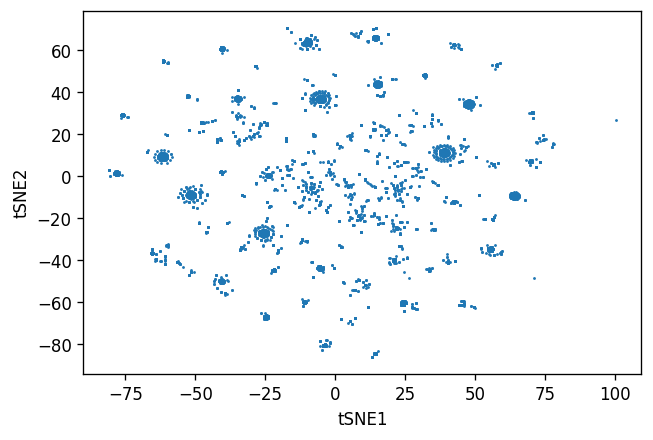

In [13]:
fig = plt.figure(dpi=120)
ax = plt.subplot(111)
ax.scatter(Y[:,0], Y[:,1],s=0.5)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(Y)
groups = AssignCluster(Y, clusters)
centers = kmeans.cluster_centers_ 

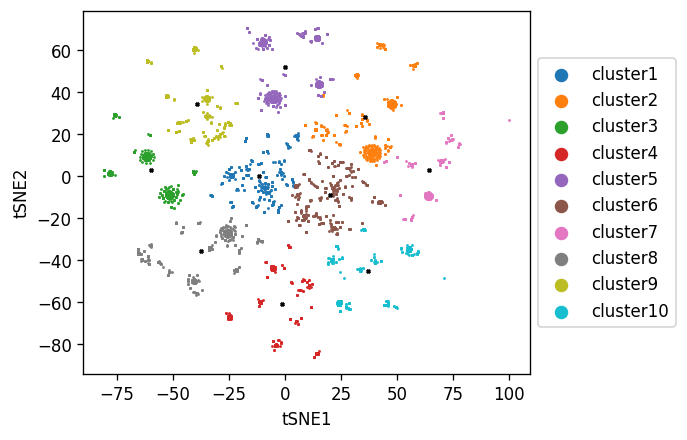

In [15]:
fig = plt.figure(dpi=120)
ax = plt.subplot(111)
for i, group in enumerate(groups):
    group = np.array(group)
    ax.scatter(group[:, 0], group[:, 1], label="cluster%d"%(i+1), s=0.5)
ax.scatter(centers[:,0], centers[:,1], s=4, color="black", marker="x")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, markerscale=10.)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [16]:
Agg = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
clusters = Agg.fit_predict(Y)
groups = AssignCluster(Y, clusters)
#centers = kmeans.cluster_centers_ 

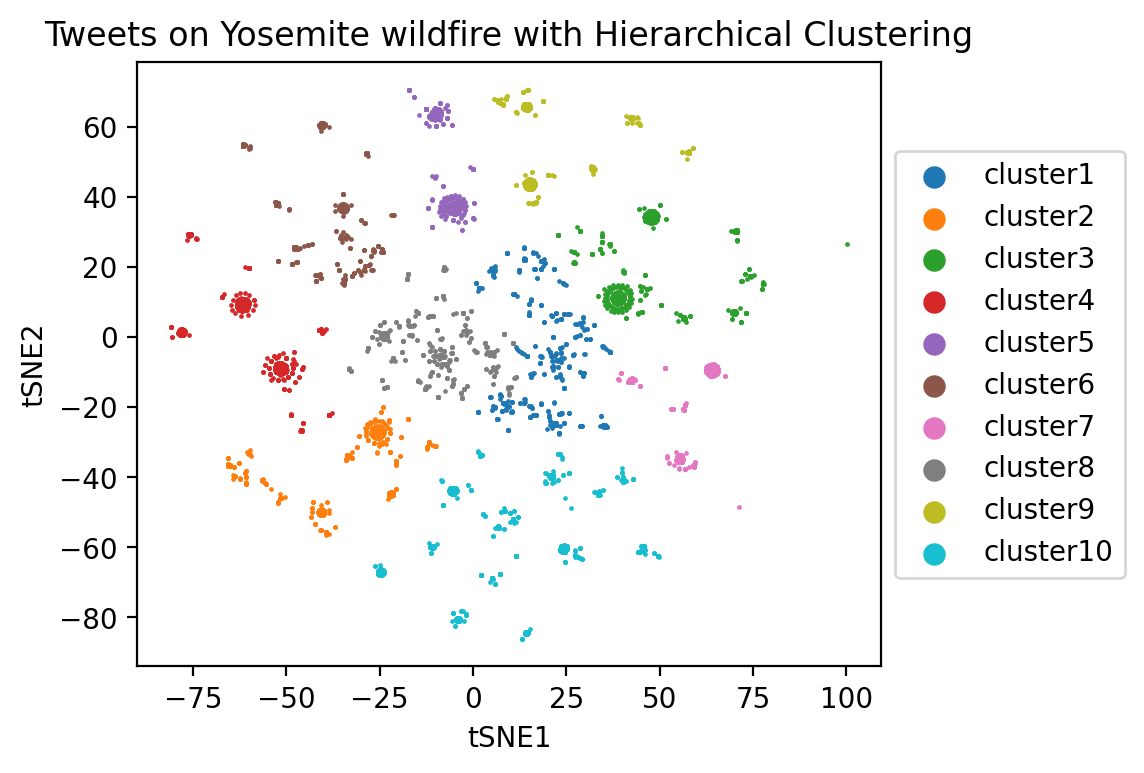

In [17]:
fig = plt.figure(dpi=200)
ax = plt.subplot(111)
for i, group in enumerate(groups):
    group = np.array(group)
    ax.scatter(group[:, 0], group[:, 1], label="cluster%d"%(i+1), s=0.5)
#ax.scatter(centers[:,0], centers[:,1], s=4, color="black", marker="x")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, markerscale=10.)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.title("Tweets on Yosemite wildfire with Hierarchical Clustering")
plt.show()

In [28]:
Keyinfos = []
for i in range(max(clusters)+1):
    topics = np.where(clusters==i)
    #print(topics)
    topics = topics[0]
    info = DC.showTopic(df, topics, Nshow=3)
    Keyinfos.append(info)
    print("-------------")

1
RT @DRUDGE_REPORT: Yosemite wildfire balloons to 84 square miles overnight... http://t.co/dr21FhNqeZ Thu Aug 22 18:05:27 +0000 2013
yosemite wildfire balloons square miles overnight

3
Yosemite area wildfire balloons in size overnight http://t.co/oo5SuSGDFT Thu Aug 22 16:45:45 +0000 2013
yosemite area wildfire balloons size overnight

6
#Yosemite-area Wildfire Balloons In Size Overnight: #montereybay # http://t.co/X1VPYAv8yl Thu Aug 22 17:17:22 +0000 2013
yosemite area wildfire balloons size overnight montereybay

7
Yosemite-area wildfire balloons in size overnight.
http://t.co/YuaI92sKTp Thu Aug 22 16:44:21 +0000 2013
yosemite area wildfire balloons size overnight

-------------
0
RT @AP: Wildfire near Yosemite more than triples in size overnight, threatens 2,500 homes, other buidlings: http://t.co/EaLEuVnHvv -DC Thu Aug 22 16:39:27 +0000 2013
wildfire near yosemite triples size overnight threatens homes buidlings

2
RT @Cal_OES: RT @ap: Wildfire near Yosemite more than triples in s

In [19]:
Keyinfos

[id                                                        370607666386579457
 text                       RT @DRUDGE_REPORT: Yosemite wildfire balloons ...
 created_at                                    Thu Aug 22 18:05:27 +0000 2013
 retweet_count                                                             13
 user_id                                                             20715638
 user_followers_count                                                    3786
 rt_id                                                            3.70606e+17
 rt_text                    Yosemite wildfire balloons to 84 square miles ...
 rt_created_at                                 Thu Aug 22 17:57:05 +0000 2013
 rt_retweet_count                                                          13
 rt_user_id                                                         1.467e+07
 rt_user_followers_count                                          1.32663e+06
 Name: 1, dtype: object,
 id                                    

In [20]:
DC.showTimeline(Keyinfos)

Thu Aug 22 16:39:27 +0000 2013
RT @AP: Wildfire near Yosemite more than triples in size overnight, threatens 2,500 homes, other buidlings: http://t.co/EaLEuVnHvv -DC

Thu Aug 22 17:59:05 +0000 2013
RT @RobertaCBS5: @CBSSF Firefighters Lose Ground Against Growing Wildfire Near Yosemite. I will have Fire Weather 5 &amp; 6p KPIX 5. http://t.c…

Thu Aug 22 18:05:27 +0000 2013
RT @DRUDGE_REPORT: Yosemite wildfire balloons to 84 square miles overnight... http://t.co/dr21FhNqeZ

Thu Aug 22 22:48:36 +0000 2013
RT @gosiawozniacka: Jerry Brown declares state of emergency for large, growing wildfire near Yosemite National Park http://t.co/tPE3FmmuHc

Fri Aug 23 02:17:17 +0000 2013
#UCWRadio  Wildfire Near Yosemite Surges, Prompts Evacuations http://t.co/bCihX95bop #news

Fri Aug 23 03:09:27 +0000 2013
News by BBC Tourists flee wildfire near Yosemite: A huge wildfire near the Yosemite National Park in Californi...  http://t.co/9AOPGbLAEa

Fri Aug 23 03:10:01 +0000 2013
Tourists flee wildfire near 

In [21]:
names = [" ".join(DC.Clean(x["text"])) for x in Keyinfos]
dates = [x["created_at"] for x in Keyinfos]
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, '%a %b %d %X %z %Y') for d in dates]

In [22]:
dates = [d.strftime("%m-%d-%X") for d in dates]
dates

['08-22-18:05:27',
 '08-22-16:39:27',
 '08-23-03:10:01',
 '08-23-03:24:51',
 '08-23-03:25:50',
 '08-23-02:17:17',
 '08-22-22:48:36',
 '08-23-04:36:22',
 '08-22-17:59:05',
 '08-23-03:09:27']

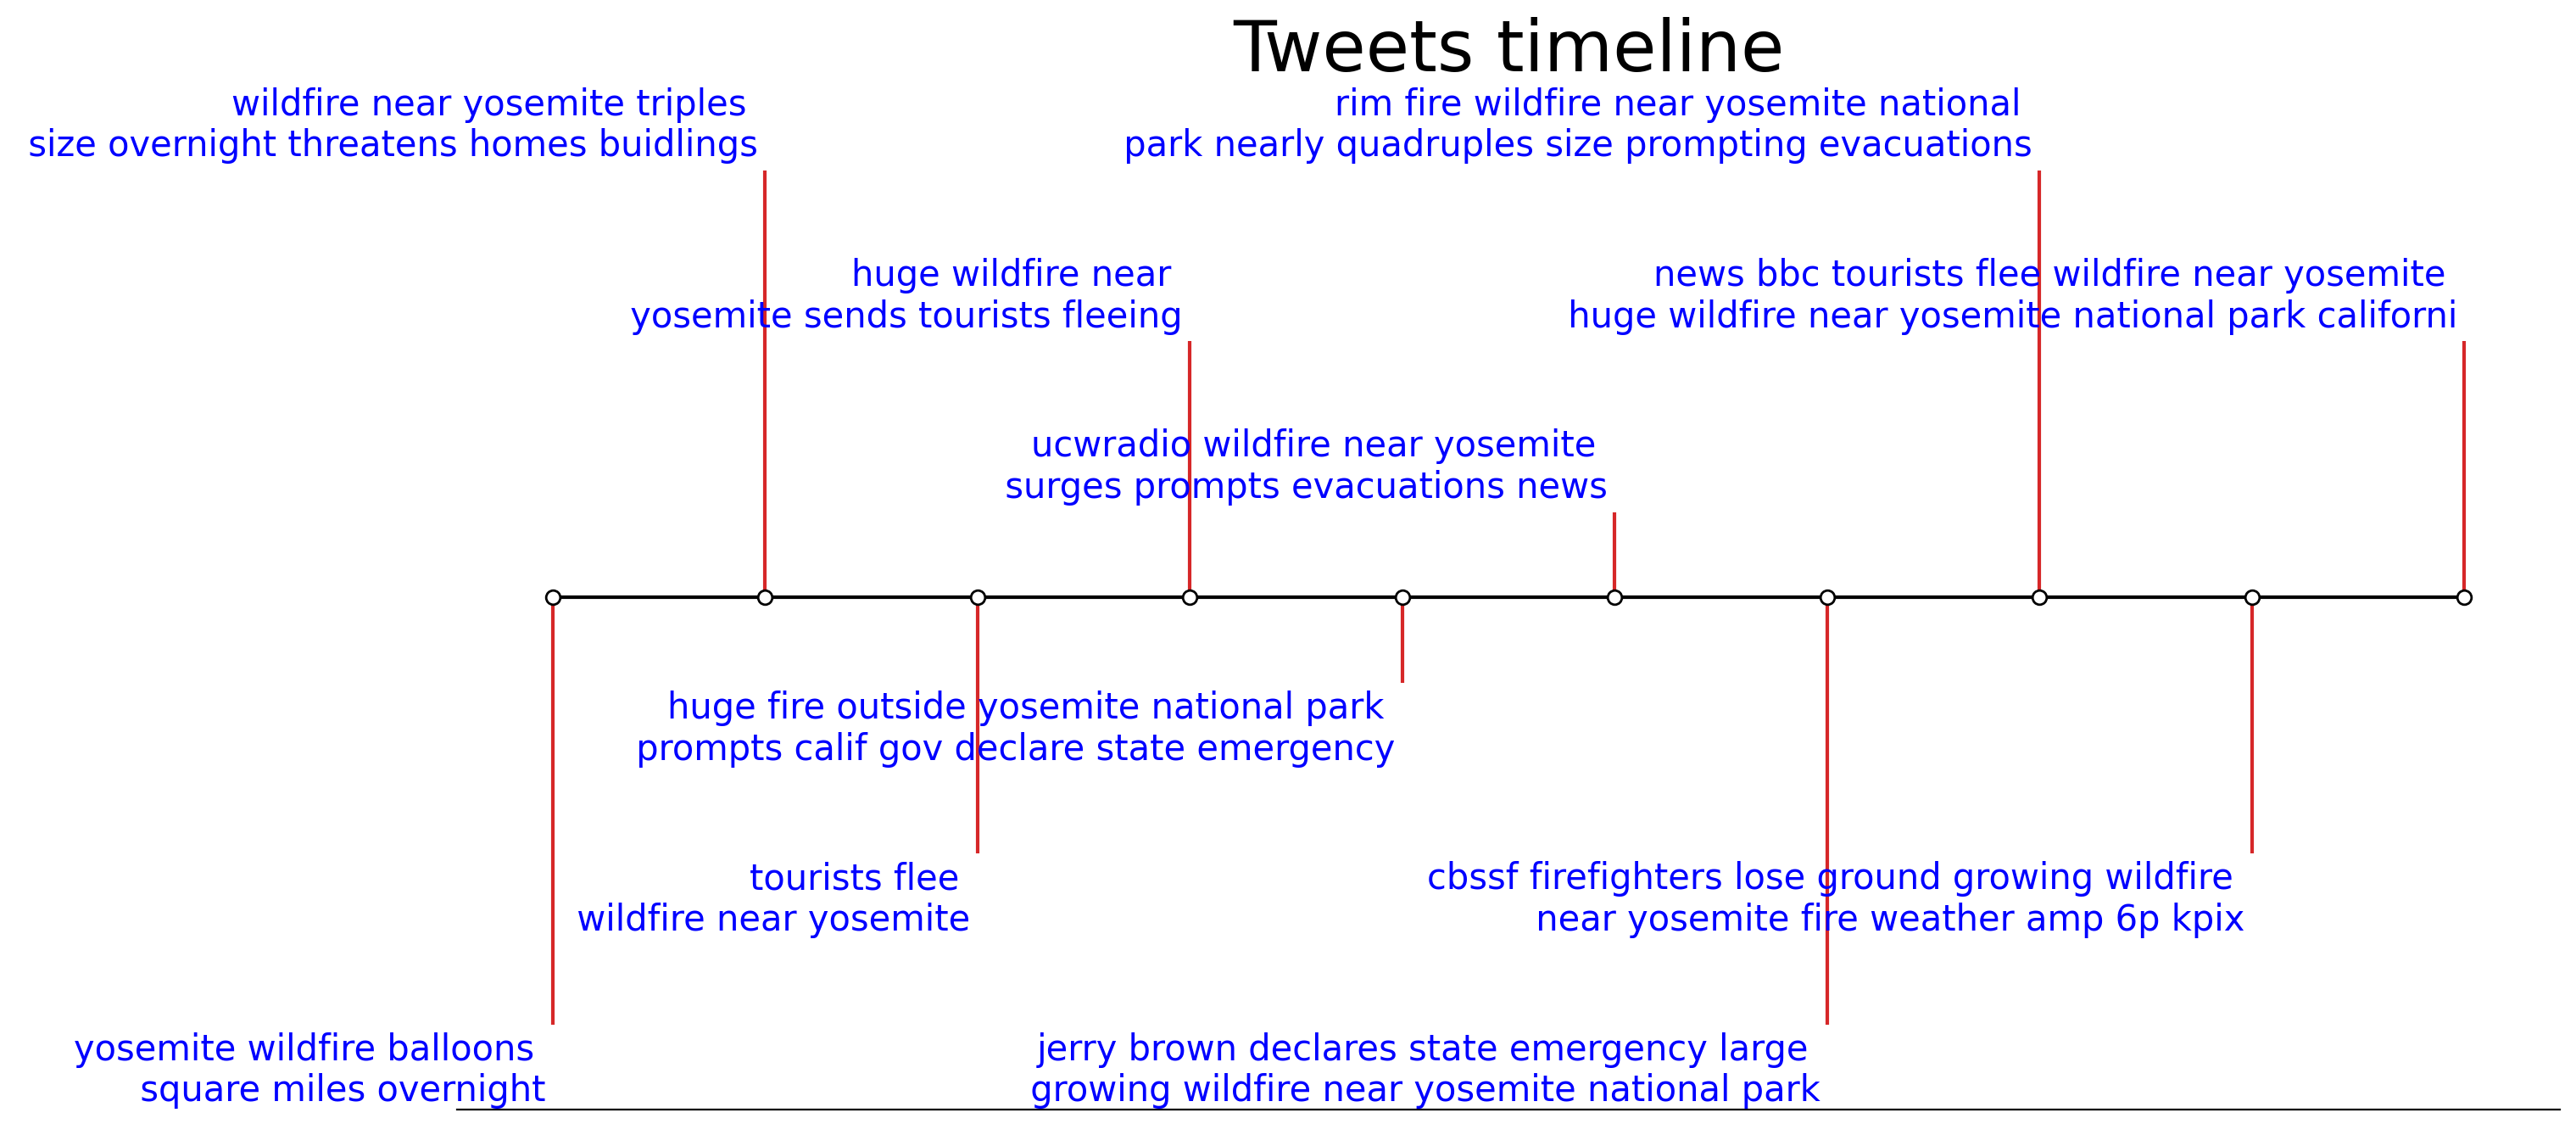

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(16,8), dpi=200)
#ax.set(title=, 
ax.set_title("Tweets timeline", fontsize=30)
markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    rs = r.split()
    half = int(len(rs)/2)
    r = rs[:half] + ["\n"] + rs[half:]
    r = " ".join(r)
    #print(r)
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right", fontsize=15, color="blue")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.HourLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%d %X"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [ ]:
plt.subplots(1,1)

In [24]:
topic1 = DC.sliceTopic(Y, (-75, -50), (-10, 10))
DC.showTopic(df, topic1)

3377
PostBulletin - Huge California wildfire spreads into Yosemite http://t.co/lBjVWYXzRH Fri Aug 23 21:28:36 +0000 2013
postbulletin huge california wildfire spreads yosemite

3505
Huge California wildfire spreads into Yosemite -- Earth Changes -- http://t.co/LDLhmBOUzx http://t.co/6aMyzZA7i6 Fri Aug 23 22:09:40 +0000 2013
huge california wildfire spreads yosemite earth changes

3557
Huge California Wildfire Spreads Into Yosemite | http://t.co/xfinOunOKy | Lexington, Kentucky: http://t.co/OoFab5Pz8r Fri Aug 23 22:23:13 +0000 2013
huge california wildfire spreads yosemite lexington kentucky

3586
Huge California #wildfire spreads into #Yosemite; Thousands evacuated in nearby communities http://t.co/d3VYGoPiVx Fri Aug 23 22:30:15 +0000 2013
huge california wildfire spreads yosemite thousands evacuated nearby communities



id                                                        371021178854719489
text                       PostBulletin - Huge California wildfire spread...
created_at                                    Fri Aug 23 21:28:36 +0000 2013
retweet_count                                                              0
user_id                                                           1621919084
user_followers_count                                                     246
rt_id                                                                    NaN
rt_text                                                                  NaN
rt_created_at                                                            NaN
rt_retweet_count                                                         NaN
rt_user_id                                                               NaN
rt_user_followers_count                                                  NaN
Name: 3377, dtype: object

In [25]:
topic2 = DC.sliceTopic(Y, (-20, 0), (-50, -30))
DC.showTopic(df, topic2)

405
RT @thedailybeast: Wildfire Spreads Near Yosemite http://t.co/0VyHDBlM90 #cheatsheet Fri Aug 23 02:43:51 +0000 2013
wildfire spreads near yosemite cheatsheet

422
RT @thedailybeast: Wildfire Spreads Near Yosemite http://t.co/0VyHDBlM90 #cheatsheet Fri Aug 23 02:36:59 +0000 2013
wildfire spreads near yosemite cheatsheet

427
Wildfire Spreads Near Yosemite http://t.co/0VyHDBlM90 #cheatsheet Fri Aug 23 02:35:12 +0000 2013
wildfire spreads near yosemite cheatsheet

462
Sad plus sad RT @thedailybeast Wildfire Spreads Near Yosemite http://t.co/BGTwyjJXnU Fri Aug 23 02:44:31 +0000 2013
sad plus sad rt thedailybeast wildfire spreads near yosemite



id                                                        370738124965412864
text                       RT @thedailybeast: Wildfire Spreads Near Yosem...
created_at                                    Fri Aug 23 02:43:51 +0000 2013
retweet_count                                                              6
user_id                                                            319939901
user_followers_count                                                    5634
rt_id                                                            3.70736e+17
rt_text                    Wildfire Spreads Near Yosemite http://t.co/0Vy...
rt_created_at                                 Fri Aug 23 02:35:12 +0000 2013
rt_retweet_count                                                           6
rt_user_id                                                       1.60128e+07
rt_user_followers_count                                          1.25586e+06
Name: 405, dtype: object

In [26]:
topic2 = DC.sliceTopic(Y, (25, 50), (10, 30))
DC.showTopic(df, topic2)

1972
@SallyNWilliams I hope yogi will be safe: "Huge wildfire near Yosemite National Park in #California  http://t.co/qa43T1GDKV" Fri Aug 23 14:42:15 +0000 2013
sallynwilliams hope yogi safe huge wildfire near yosemite national park california

2114
Wildfire spreads to Yosemite National Park http://t.co/CD2W9mxzXh Fri Aug 23 15:16:58 +0000 2013
wildfire spreads yosemite national park

2130
Wildfire spreads to Yosemite National Park http://t.co/V5hy0OSS3V Fri Aug 23 15:17:07 +0000 2013
wildfire spreads yosemite national park

2131
Wildfire spreads to Yosemite National Park http://t.co/G8gCBWzuy7 #news Fri Aug 23 15:16:36 +0000 2013
wildfire spreads yosemite national park news



id                                                        370918914072387585
text                       @SallyNWilliams I hope yogi will be safe: "Hug...
created_at                                    Fri Aug 23 14:42:15 +0000 2013
retweet_count                                                              0
user_id                                                             22004551
user_followers_count                                                     381
rt_id                                                                    NaN
rt_text                                                                  NaN
rt_created_at                                                            NaN
rt_retweet_count                                                         NaN
rt_user_id                                                               NaN
rt_user_followers_count                                                  NaN
Name: 1972, dtype: object

In [27]:
topic2 = DC.sliceTopic(Y, (0, 50), (-30, 20))
DC.showTopic(df, topic2, chooseOne=False)

TypeError: showTopic() got an unexpected keyword argument 'chooseOne'

In [30]:
word_embeddings = LoadWordEmbeddings()

In [44]:
sentence_vectors = Sentence2WE(Clean_sentences, word_embeddings)

In [66]:
sim_mat = TextRankScoreMat(sentence_vectors)

KeyboardInterrupt: 

In [ ]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
for i in range(10):
    print(ranked_sentences[i][1])

In [ ]:
"""
===============================================
Creating a timeline with lines, dates, and text
===============================================

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.
"""

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

##############################################################################
# Next, we'll create a `~.Axes.stem` plot with some variation in levels as to
# distinguish even close-by events. In contrast to a usual stem plot, we will
# shift the markers to the baseline for visual emphasis on the one-dimensional
# nature of the time line.
# For each event, we add a text label via `~.Axes.annotate`, which is offset
# in units of points from the tip of the event line.
#
# Note that Matplotlib will automatically plot datetime inputs.


# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()


#############################################################################
#
# ------------
#
# References
# """"""""""
#
# The use of the following functions, methods and classes is shown
# in this example:

import matplotlib
matplotlib.axes.Axes.stem
matplotlib.axes.Axes.annotate
matplotlib.axis.Axis.set_major_locator
matplotlib.axis.Axis.set_major_formatter
matplotlib.dates.MonthLocator
matplotlib.dates.DateFormatter
